<a href="https://colab.research.google.com/github/AVerma27/AdaBoost-Classifier/blob/main/LFW_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name :Aditi Verma  Roll No: 21301010  MTech First Year

# Labelled Faces in the Wild (LFW) Dataset
### Dataset Download link : https://www.kaggle.com/jessicali9530/lfw-dataset

## CNN Implementation

### Installing the required package

***imbalanced-learn*** *is a python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.*

In [ ]:
!pip install keras scikit-learn imbalanced-learn

### Importing necessary packages

In [ ]:
import numpy as np
import keras
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

### Downloading and importing dataset

The cell below will download the dataset using the function **fetch_lfw_people** and will check the dimensionality of the dataset.

Some parameters that are used are: the minimum number of images per class (person), image size, etc.

The link to the function's documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, color=True, resize=1.0,
                              slice_=(slice(48, 202), slice(48, 202)))

X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('number of examples: {}'.format(y.shape[0]))
print('dimensionality of images: {}'.format(X.shape[1:]))
print('number of unique classes (people): {}'.format(n_classes))

number of examples: 3023
dimensionality of images: (154, 154, 3)
number of unique classes (people): 62


*From the above result we can observe that there are **3023** examples, **dimensionality** is **154x154x3** and **62 unique classes** i.e we have data of **62 people**.*

### Printing names of 62 Classes / Celebrities

In [ ]:
print (target_names)


['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

### Plotting a histogram

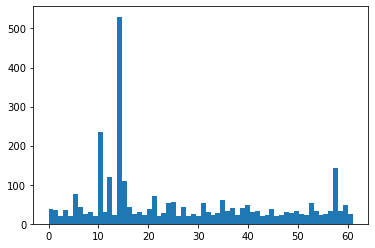

In [ ]:
_ = plt.hist(y, bins=n_classes)

### Next, we display a random image along with its label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Jacques Chirac


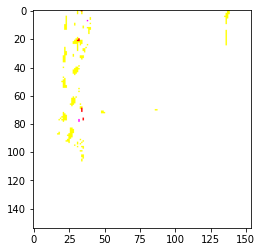

In [ ]:
i = np.random.randint(len(lfw_people.images))
plt.imshow(lfw_people.images[i] * 255)
plt.grid(False)
print(target_names[y[i]])

### Now building an All Convolutional Net inspired model

#### *Striving for Simplicity: The All Convolutional Net*
#### *Reference: https://arxiv.org/abs/1412.6806*

In [ ]:
from keras.layers import Input
from keras.layers import Conv2D, GlobalAvgPool2D
from keras.layers import Dropout, Activation


### Defining the model

It consists of
* 10 convolutional layers with increasing number of filters (from 12 to 48).
* Every second layer has kernels of size (2, 2) with strides (2, 2) and serves the purpose of a trainable pooling layer since it reduces spacial dimensionality.
* After that, we add Dropout for regularization which sets 50% of randomly chosen activations to 0. 
* Then, we add the last convolutional layer for dimensionality expansion to match the number of classes that we predict. 
* Finallly, we apply global average polling to squash spacial dimenaions. We could do that with another convolutional layer or a fully connected leyer, however, it would increase the number of weights to train and, in turn, a risk of overfitting.

In [ ]:
input = Input(shape=X.shape[1:])                                  # 154x154x3
x = Conv2D(12, (3, 3), padding='same', activation='relu')(input)  # 154x154x12
x = Conv2D(12, (2, 2), strides=(2, 2), activation='relu')(x)      # 77x77x12
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)      # 77x77x16
x = Conv2D(16, (2, 2), strides=(2, 2), activation='relu')(x)      # 38x38x16
x = Conv2D(24, (3, 3), padding='same', activation='relu')(x)      # 38x38x24
x = Conv2D(24, (2, 2), strides=(2, 2), activation='relu')(x)      # 19x19x24
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)      # 19x19x32
x = Conv2D(32, (2, 2), strides=(2, 2), activation='relu')(x)      # 9x9x32
x = Conv2D(48, (3, 3), padding='same', activation='relu')(x)      # 9x9x48
x = Conv2D(48, (2, 2), strides=(2, 2), activation='relu')(x)      # 4x4x48
x = Dropout(0.5)(x)                                               # 4x4x48
x = Conv2D(n_classes, (1, 1))(x)                                  # 4x4x62
x = GlobalAvgPool2D()(x)                                          # 62
output = Activation('softmax')(x)                                 # 62


### Plotting the CNN Architecture

In [ ]:
from keras.models import Model
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 154, 154, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 154, 154, 12)      336       
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 12)        588       
                                                                 
 conv2d_2 (Conv2D)           (None, 77, 77, 16)        1744      
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 16)        1040      
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 38, 24)        3480      
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 24)        2328  

### Creating a DataGenerator object for adding some data augmentation inorder to prevent Overfitting

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1)

### Training the model

Now we are ready to define training procedure that involves setting some hyperparameters, e.g. batch size, optimization algorithm and base learning rate, number of epochs, etc.

Also, since our dataset is imbalanced, it's good to use oversampling, as it was shown in **A systematic study of the class imbalance problem in convolutional neural networks**.

**Refrence: https://arxiv.org/abs/1710.05381**

In [ ]:
from keras import Model
from keras.utils import np_utils
import tensorflow as tf

batch_size = 10
test_split = 0.2
base_lr = 0.001
epochs = 15

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, 
                                                    stratify=y, random_state=42)

# oversampling each class to contain at least 256 examples
sampling_targets = np.maximum([256] * n_classes, np.bincount(y_train))
ratio_dict = dict(zip(range(n_classes), sampling_targets))
ros = RandomOverSampler(sampling_strategy=ratio_dict, random_state=42)

X_train_shape = X_train.shape
X_train = np.reshape(X_train, (X_train_shape[0], -1))
X_train, y_train = ros.fit_resample(X_train, y_train)
X_train = np.reshape(X_train, (len(X_train),) + X_train_shape[1:])

# encoding of labels
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

# compile model and define optimization
model = Model(inputs=input, outputs=output)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(lr=base_lr),
              metrics=['accuracy'])

# model training 🎉
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

C:\Users\aditi\anaconda3\lib\site-packages\keras\optimizer_v2\nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)
C:\Users\aditi\AppData\Local\Temp/ipykernel_12944/3185264170.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),


Epoch 1/15
1604/1604 [==============================] - 286s 174ms/step - loss: 3.9193 - accuracy: 0.0425 - val_loss: 3.5194 - val_accuracy: 0.1339
Epoch 2/15
1604/1604 [==============================] - 238s 148ms/step - loss: 3.2416 - accuracy: 0.1450 - val_loss: 2.8722 - val_accuracy: 0.2198
Epoch 3/15
1604/1604 [==============================] - 555s 346ms/step - loss: 2.5893 - accuracy: 0.2792 - val_loss: 2.4428 - val_accuracy: 0.3140
Epoch 4/15
1604/1604 [==============================] - 4006s 2s/step - loss: 2.0994 - accuracy: 0.3979 - val_loss: 2.0409 - val_accuracy: 0.4264
Epoch 5/15
1604/1604 [==============================] - 333s 207ms/step - loss: 1.7848 - accuracy: 0.4773 - val_loss: 1.5659 - val_accuracy: 0.5372
Epoch 6/15
1604/1604 [==============================] - 342s 213ms/step - loss: 1.5464 - accuracy: 0.5404 - val_loss: 1.4377 - val_accuracy: 0.5769
Epoch 7/15
1604/1604 [==============================] - 338s 211ms/step - loss: 1.3563 - accuracy: 0.5920 - val_lo

*After **15 epochs** we are getting an accuracy of **77%**.*

*With increase in epoch number, the accuracy of the model increases.*

In [ ]:
model.save('weights.h5')

### Results

#### Plotting the training history to assess the model's accuracy

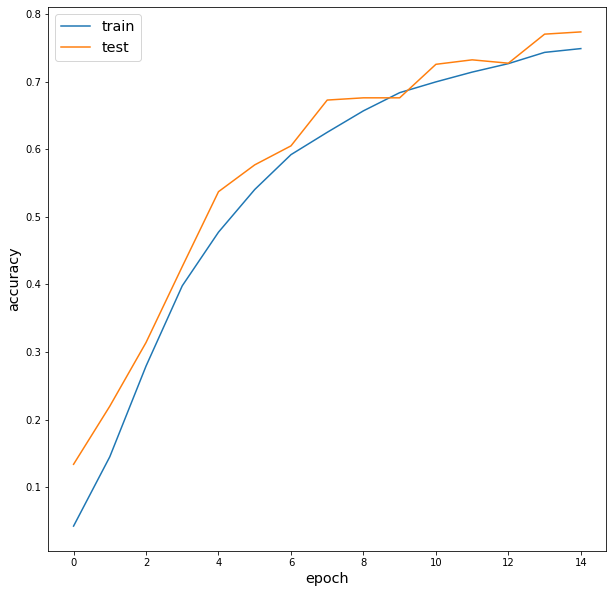

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy', fontsize='x-large')
plt.xlabel('epoch', fontsize='x-large')
plt.legend(['train', 'test'], loc='upper left', fontsize='x-large')


#### Get predictions from the test set to visualize results

In [ ]:
y_pred = model.predict(X_test, batch_size=len(X_test), verbose=1)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 1s 1s/step


#### We reached an overall accuracy of around  80%. Now generating the Confusion Matrix

### Visualising the results

In [ ]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(0, len(classes), 2)
    plt.xticks(tick_marks, classes[tick_marks], rotation=90)
    plt.yticks(tick_marks, classes[tick_marks])
    plt.ylabel('True label', fontsize='x-large')
    plt.xlabel('Predicted label', fontsize='x-large')

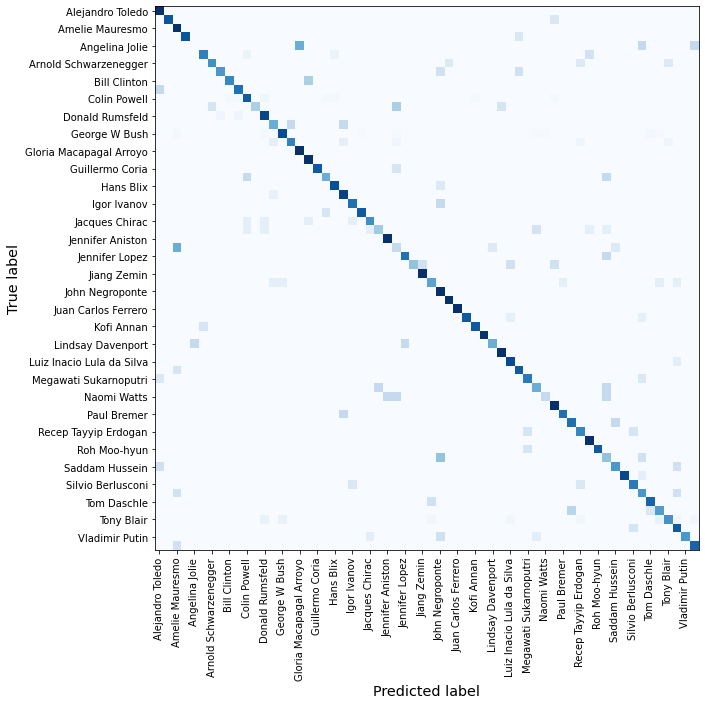

In [ ]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm, classes=target_names)
plt.grid(False)

### Assuming that all classes have the same importance, more appropriate measure would be the average accuracy among all classes. 

In [ ]:
def plot_barh(labels, values):
    fig = plt.figure(figsize=(12, 8))
    y_pos = np.arange(len(labels))
    plt.barh(y_pos, values, align='center', alpha=0.5)
    plt.yticks(y_pos, labels)
    plt.xticks(np.arange(0.0, 1.0, 0.05))
    plt.xlabel('accuracy', fontsize='x-large')
    plt.axes().xaxis.grid(color='black', linestyle='-', linewidth=0.5)
    axes = plt.gca()
    axes.set_xlim([0.0, 1.0])
    axes.axvline(np.mean(values), color='green', linewidth=2)
    plt.tight_layout()

In [ ]:
class_accuracies = [cm[i, i] for i in range(cm.shape[0])]

In [ ]:
print(class_accuracies)

[1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.0, 0.6875, 0.625, 0.6, 0.6666666666666666, 0.75, 0.8297872340425532, 0.3333333333333333, 0.9166666666666666, 0.5, 0.8867924528301887, 0.6818181818181818, 1.0, 1.0, 0.8333333333333334, 0.5, 0.875, 0.9285714285714286, 0.75, 0.8333333333333334, 0.6363636363636364, 0.36363636363636365, 1.0, 0.25, 0.75, 0.4, 1.0, 0.5454545454545454, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 1.0, 0.5, 1.0, 0.9, 0.8333333333333334, 0.7142857142857143, 0.5, 0.25, 1.0, 0.75, 0.75, 0.6666666666666666, 1.0, 0.8333333333333334, 0.4, 0.6, 0.9090909090909091, 0.7142857142857143, 0.6, 0.8, 0.5714285714285714, 0.6206896551724138, 0.8333333333333334, 0.6, 0.8]


In [ ]:
'''plot_barh(target_names, class_accuracies)
print('average accuracy: {}%'.format(np.round(np.mean(class_accuracies) * 100.0, 1)))'''

"plot_barh(target_names, class_accuracies)\nprint('average accuracy: {}%'.format(np.round(np.mean(class_accuracies) * 100.0, 1)))"

### Plotting Bar Graph

average accuracy: 73.7%


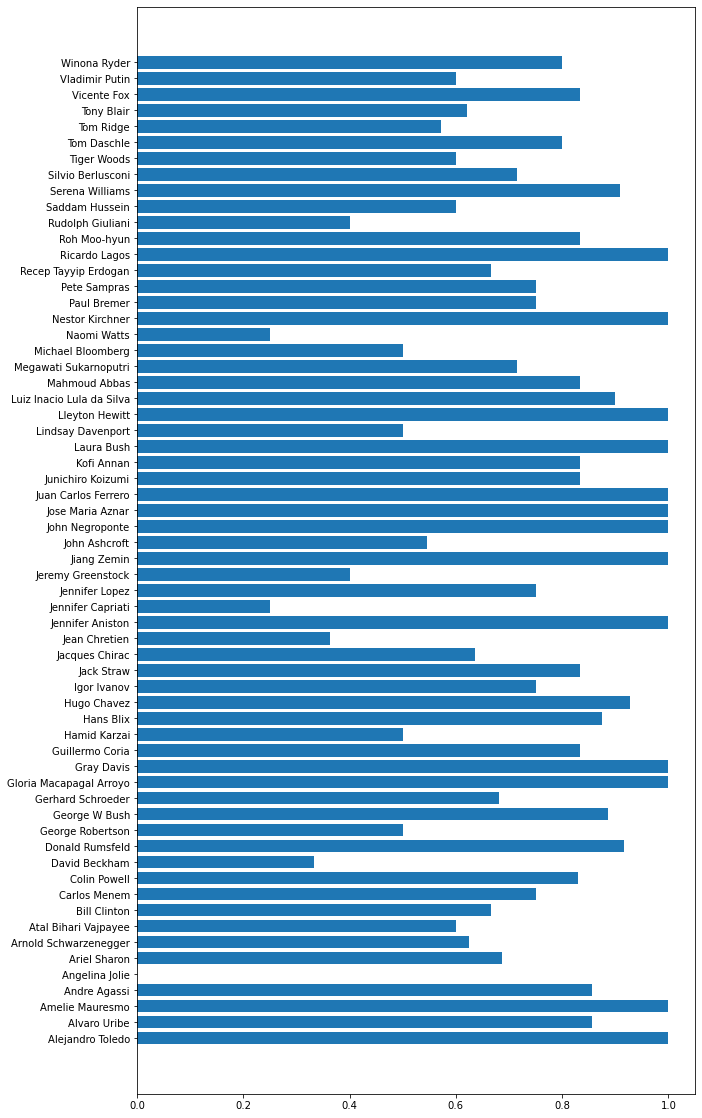

In [ ]:
plt.figure(figsize = (10,20))
plt.barh(target_names, class_accuracies)
print('average accuracy: {}%'.format(np.round(np.mean(class_accuracies) * 100.0, 1)))

### Plotting Line Graph

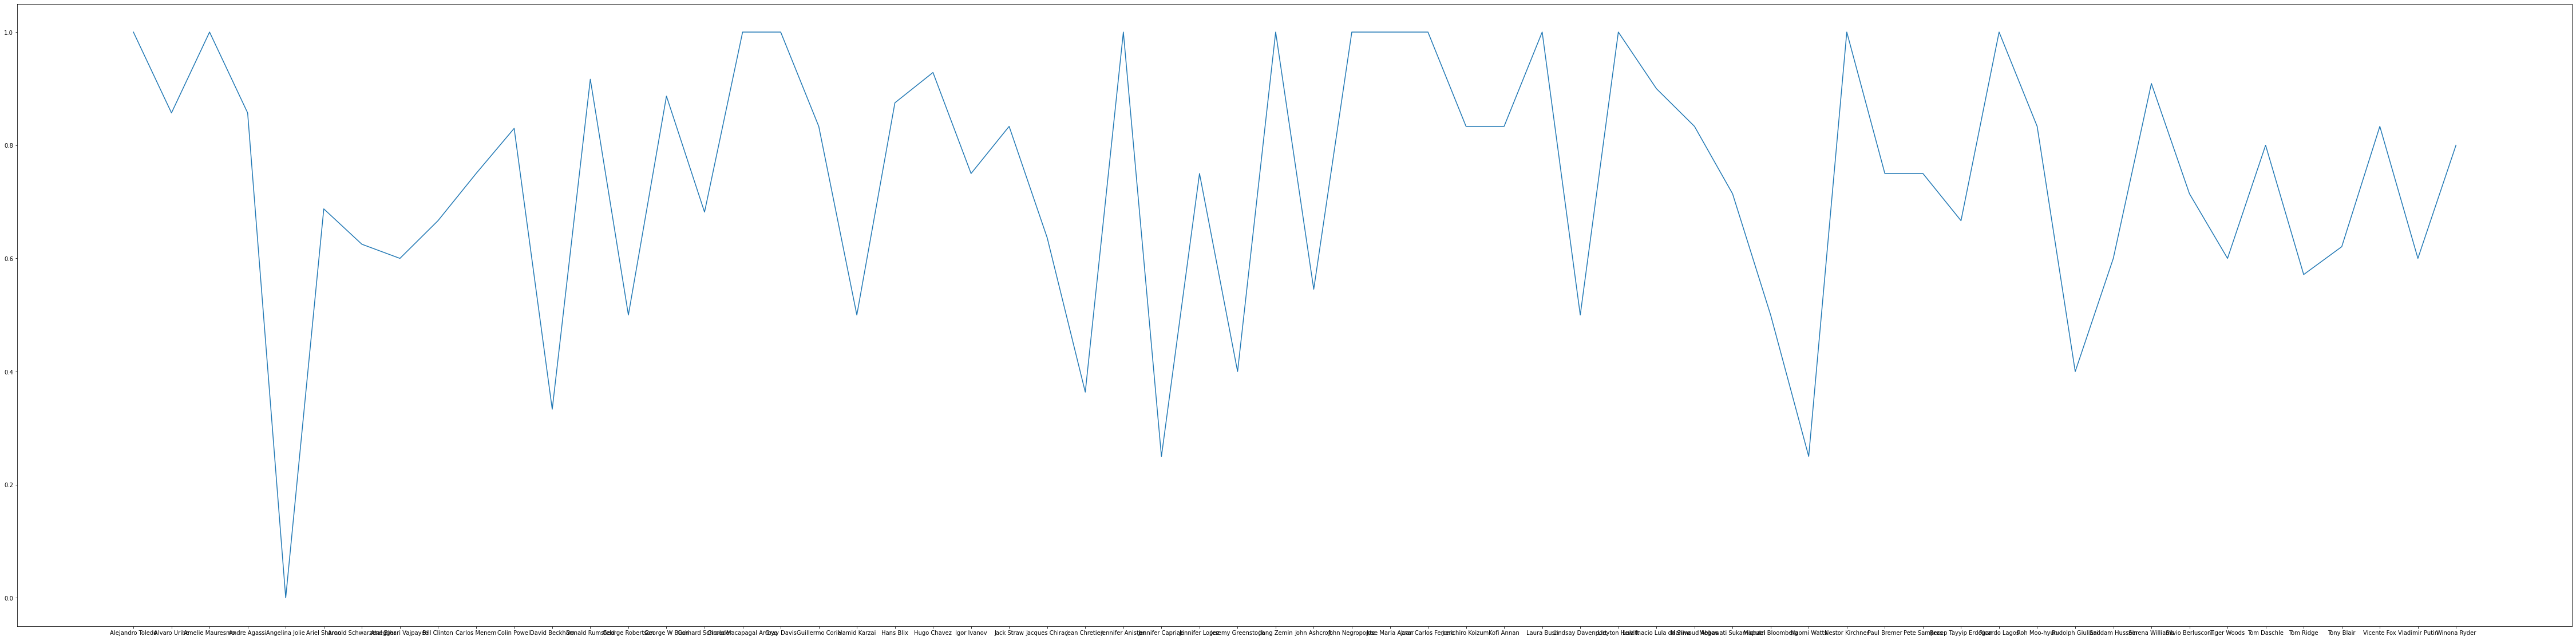

In [ ]:
plt.figure(figsize = (80,20))
plt.plot(target_names, class_accuracies)

### Calculating Recall

In [ ]:
recall = np.diag(cm) / np.sum (cm, axis = 1)

np.mean(recall)


0.7366234965795581

### Calculating Precision 

In [ ]:
precision = np.diag(cm) / np.sum (cm, axis = 0)

np.mean(precision)

0.764243607690631

***After implementing CNN model in the LFW Dataset, we can observe that we are getting:***
* Accuracy: **77%**
* Recall: **73%**
* Precision: **76%**